In [2]:
# Standard library imports
import random

# Third party imports
import numpy as np
import torch

# Local imports
from synthetic_data import plot_synthetic, return_synthetic_data

from sisal.plot import Plot

# Sisal imports
from sisal.solver import Solver
from sisal.utils import normalize_train_test_full_loader

# Synthetic data

In [ ]:
# This function will create a synthetic dataset of various shapes with simulated spectra.
centroids, SNR, mask, mask_to_name = return_synthetic_data()

In [4]:
train_loader, test_loader, full_index_loader = normalize_train_test_full_loader(
    centroids, mask, batch_size=32, alpha=SNR
)

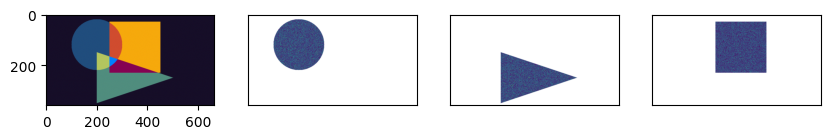

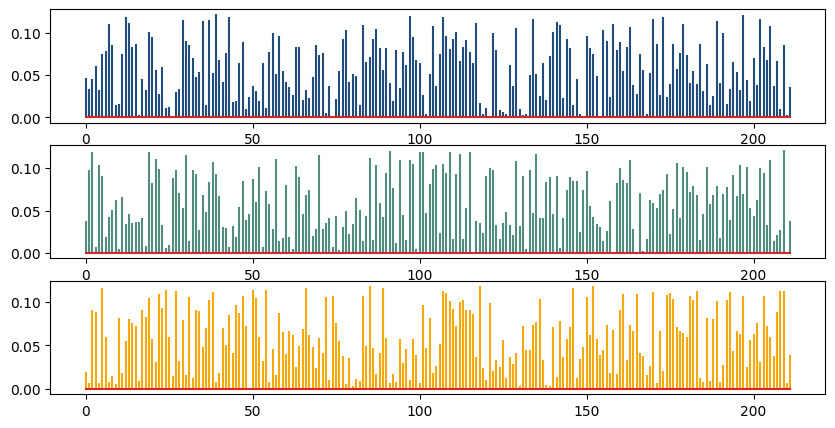

In [5]:
plot_synthetic()

## Arguments for the Beta VAE

In [6]:
beta = 4
z_dim = 2
in_size = centroids.shape[1]
epochs = 40
device = "cpu"
save_model_epochs = False
save_loss = False
train = True

In [7]:
# For reproducibility

# Set a fixed seed
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)  # Reproducibility across GPUs

# Deterministic behavior
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Training SISAL model

In [8]:
net = Solver(beta, z_dim, in_size, epochs, device, save_model_epochs, save_loss, train)

### Path where the model is saved

In [9]:
model_filename = "model_synthetic.pth"

In [10]:
# The training will take some time.
# The training might finish before the maximum number of epochs if early stopping is triggered.
net.train(train_loader, test_loader, model_filename)

Training model:   0%|          | 0/40 [00:00<?, ?epoch/s]/Users/lgmigas/Documents/GitHub/sisal/venv/lib/python3.10/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)
Training model:  18%|█▊        | 7/40 [09:50<46:25, 84.40s/epoch]


PosixPath('model_synthetic.pth')

In [11]:
p = Plot(model_filename, device, train_loader, test_loader, full_index_loader)

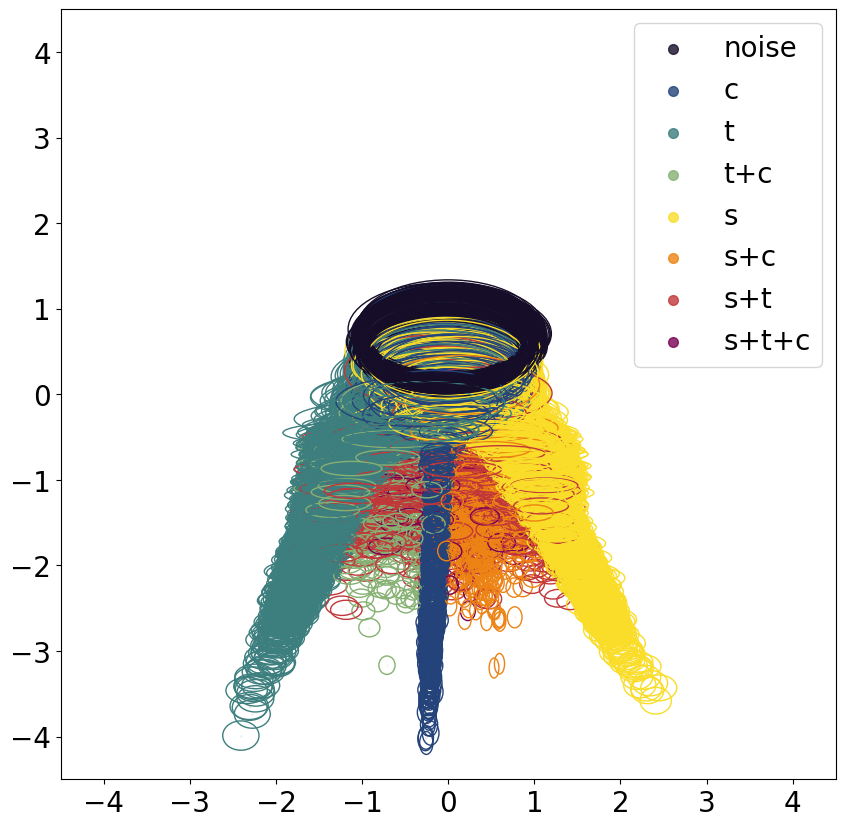

In [12]:
p.plot_latent_dim_with_var(mask_to_name, p=0.2)

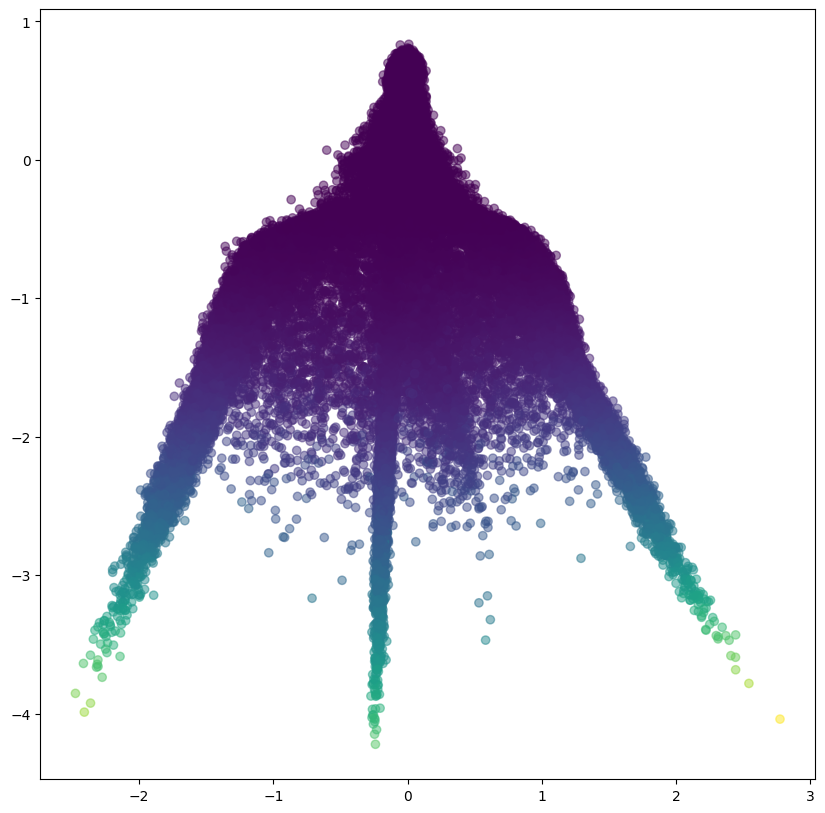

In [13]:
p.plot_latent_dim_coeff(p=0.7)